In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn

In [2]:
ls

Untitled.ipynb  iris.data.csv


In [37]:
# we dont' have a header(feature names), we set header:= None
iris_data = pd.read_csv("iris.data.csv", header=None)

<h1> Data Preprocessing </h1>

In this section, we will split the data into trainining and test set; then we will explore the
data set

In [38]:
iris_data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
# we change the features of the data to explicit names

iris_data.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]

In [40]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
X_data = iris_data[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y_data = iris_data["class"]

In [42]:
y_data.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

In [43]:
y_data[0]

'Iris-setosa'

In [44]:
# encoding class labels
class_mapping = {label:idx for idx, label in enumerate(np.unique(y_data))}
print(class_mapping)

{'Iris-setosa': 0, 'Iris-virginica': 2, 'Iris-versicolor': 1}


In [52]:
y_data.values.shape

(150,)

In [65]:
# encoding class labels
from sklearn.preprocessing import LabelEncoder
le  = LabelEncoder()
y_data_en = le.fit_transform(y_data.values)
print(y_data_en[:10])
print(y_data_en)

[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [66]:
# print the encoding labels
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [77]:
# By default, train and test set will be splitted into 0.75% and 0.25% of original dataset
# By default, dataset is shuffled before the split
# set random_state in order for later replication(we can replicate the result this way since
# same split will occur if we use the same random_state number)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data_en, random_state=7)

In [78]:
print("X_train and X_test shape : {0} vs {1}".format(X_train.shape, X_test.shape) )
print("y_train and y_test shape : {0} vs {1}".format(y_train.shape, y_test.shape))

X_train and X_test shape : (112, 4) vs (38, 4)
y_train and y_test shape : (112,) vs (38,)


In [80]:
X_train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,112.000000,112.000000,112.000000,112.000000
mean,5.843750,3.050893,3.728571,1.183929
std,0.856536,0.436405,1.802622,0.777331
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.750000,3.000000,4.200000,1.300000
75%,6.400000,3.300000,5.100000,1.900000
max,7.900000,4.400000,6.900000,2.500000


<h2> Visuzlize Feature Distributions </h2>

In order to get sense of data, we will plot the feature distribution.
In this way, we can understand not only the each feature's distribution but also the
correlation between each feature

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c8ceda0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1cdc92b0>]], dtype=object)

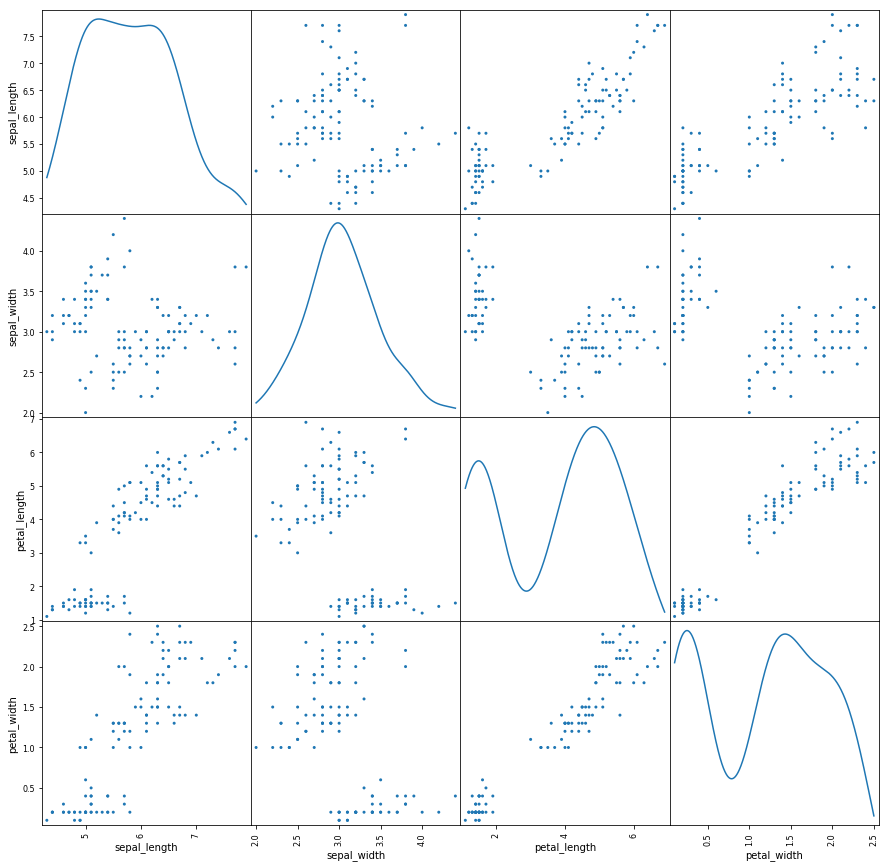

In [95]:
pd.plotting.scatter_matrix(X_train, alpha=1.0, figsize=(15, 15), diagonal="kde")


# What we can infer from the data plot above

Each feature distribution:
Sepal length and petal length are almost following normal distribution (Sepal length
does not trace bell curve though).
Petal length and petal width trace bimodal distribution (meaning that there are two groups or two most frequent samples) 


Correlation:
Positive correlation can be seen between sepal_length and petal_length, between petal_length  and petal_width. Septal_length and petal_width are somewhat correlated positively but it is not clear.

We can confirm the correlation we inferred above by using a heatmap.

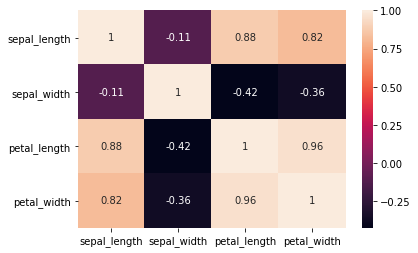

In [97]:
sns.heatmap(X_train.corr(), annot=True)

Our inference is confirmed.

Positive correlation ( in decreasing order ) for 3 distributions:

    1. 0.96 for petal_length and petal_width
    2. 0.88 for septal_length and petal_length
    3. 0.82 for petal_width and septa_length

In [36]:
# create a dictionary for decoding class labels for later purpose
inv_class_mapping = {idx:label for label, idx in class_mapping.items()}
print(inv_class_mapping)

{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}


In [33]:
y_data = y_data.map(class_mapping)
y_data.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_data[])